In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score, precision_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import StratifiedKFold
import numpy as np
import phik
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from helper import *
from plots import *
from category_encoders import TargetEncoder
from sklearn.preprocessing import FunctionTransformer
from imblearn.over_sampling import SMOTE
from functions import *
from imblearn.pipeline import Pipeline
import functions
import importlib
importlib.reload(functions)  # чтобы изменения в functions.py подхватились
import os

In [2]:
SEED = 42

In [3]:
#Cчитываем датасет
df = pd.read_csv(f"d:\dowload2\Australia_weather\weatherAUS.csv")
print(df.head())

         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7    

In [4]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [5]:
print(df.dtypes)#Смотрим на тип данных объектов и проверяем количество пропусков
print(df.isnull().sum())

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object
Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         558

In [ ]:

df.drop(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis=1, inplace=True)#Слишком большое количествор пропусков в признаках следовательно не будут нести особый смысл
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   WindGustDir    135134 non-null  object 
 6   WindGustSpeed  135197 non-null  float64
 7   WindDir9am     134894 non-null  object 
 8   WindDir3pm     141232 non-null  object 
 9   WindSpeed9am   143693 non-null  float64
 10  WindSpeed3pm   142398 non-null  float64
 11  Humidity9am    142806 non-null  float64
 12  Humidity3pm    140953 non-null  float64
 13  Pressure9am    130395 non-null  float64
 14  Pressure3pm    130432 non-null  float64
 15  Temp9am        143693 non-null  float64
 16  Temp3pm        141851 non-null  float64
 17  RainToday      142199 non-nul

In [7]:
df.duplicated().sum()#проверяем есть ли дубликаты в данных

np.int64(0)

In [8]:
df = df.dropna(subset=['RainTomorrow'])#не имеет смысла хранить строки в которых неизвестен таргет + их не такое большое количество

In [9]:
df = data_encoded_df(df, 'Date')#преобразуем дату в числовые признаки по дням месяцам и годам

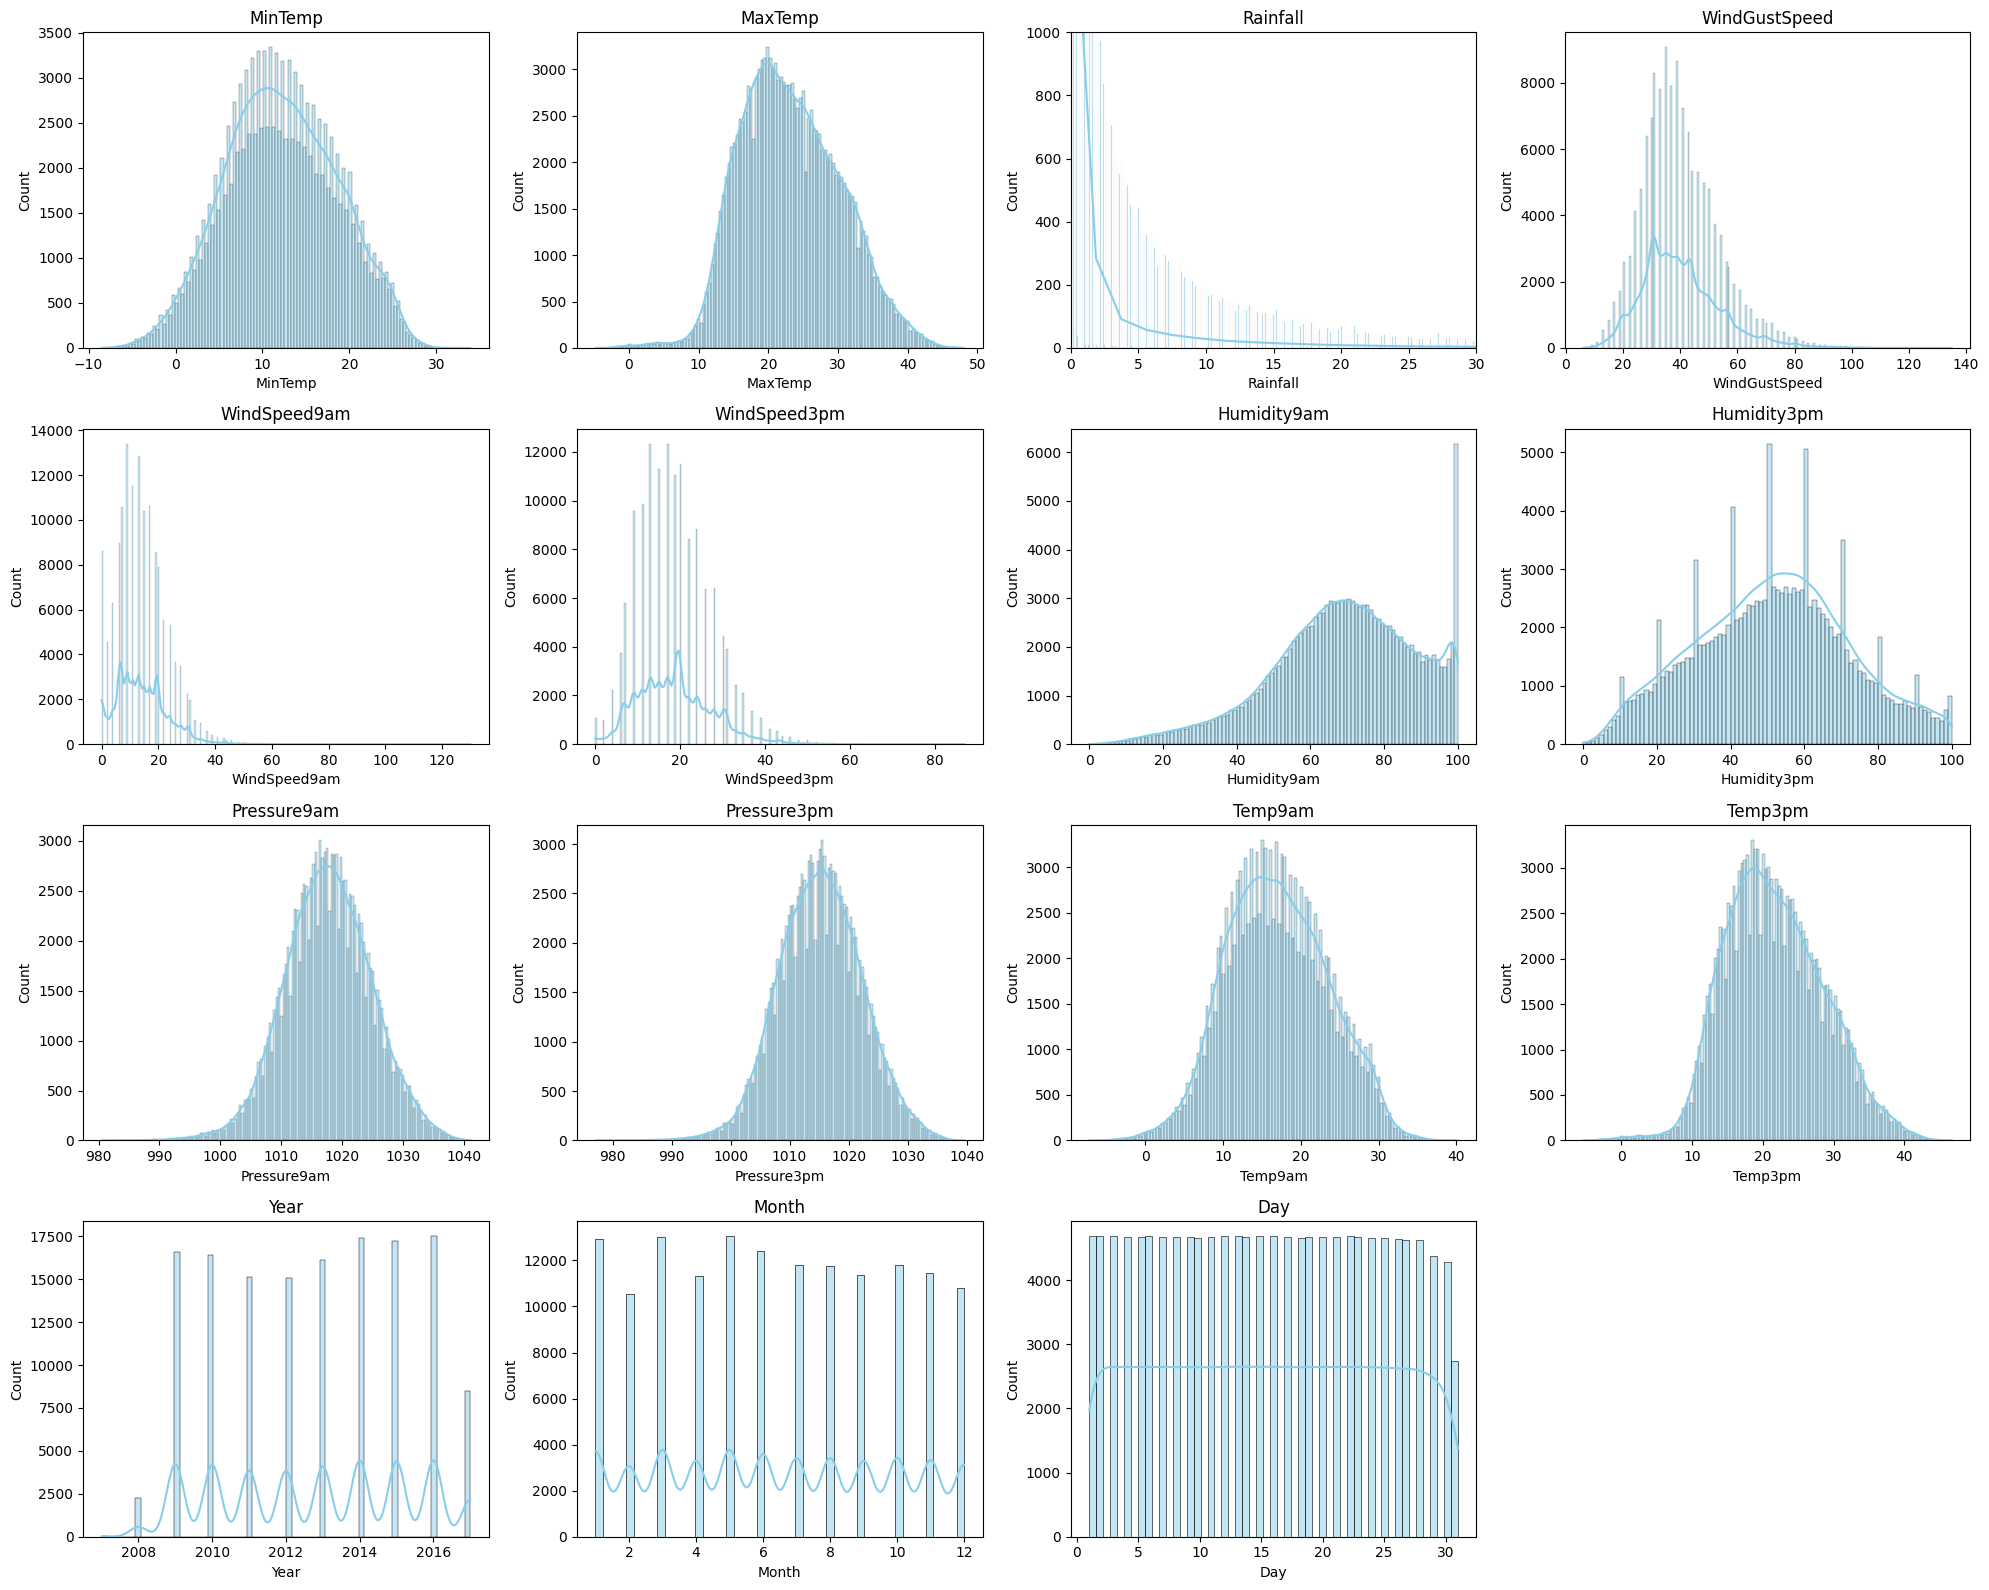

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = df.select_dtypes(include='number').columns  # только числовые
n_cols = 4  # число графиков в одном ряду
n_rows = (len(num_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    if col == 'Rainfall':
        axes[i].set_ylim(0, 1000)  # задаём лимит через axes[i]
        axes[i].set_xlim(0, 30)
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(col)

# Оставшиеся пустые графики скрываем
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
#Видим нормальное распределение у большинства признаков, у Humidity9am левое смещение, у Rainfall не нормальное распределение


C:\Users\dima2\AppData\Local\Temp\ipykernel_13260\774907253.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=top_values, palette='pastel')


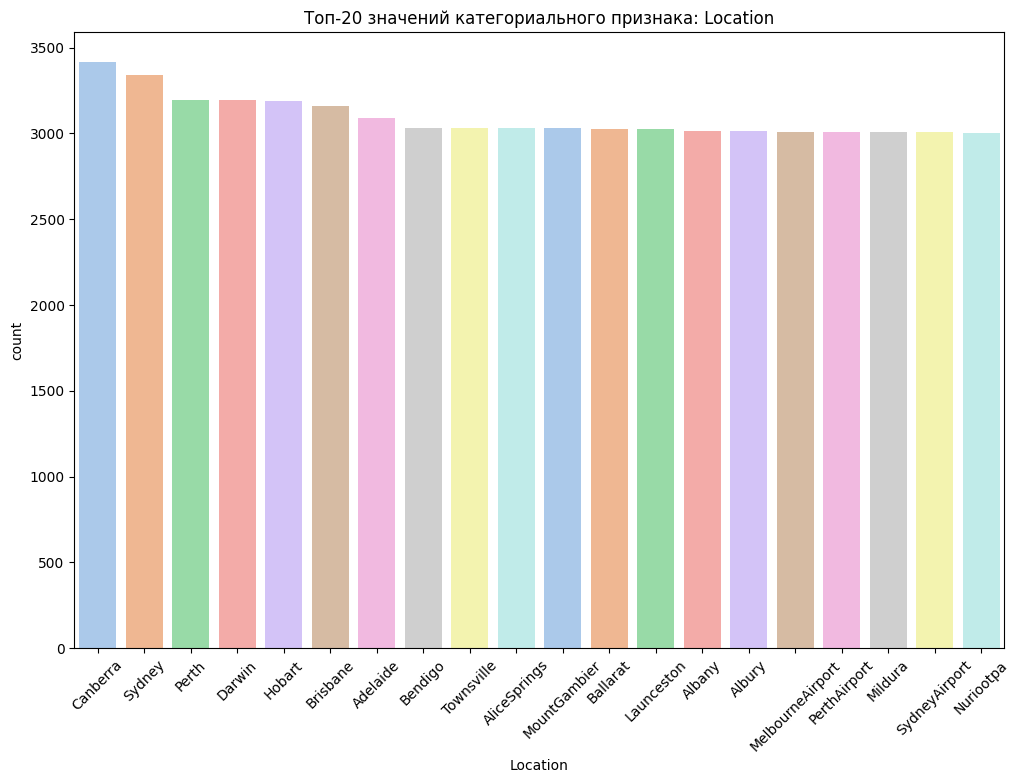

C:\Users\dima2\AppData\Local\Temp\ipykernel_13260\774907253.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=top_values, palette='pastel')


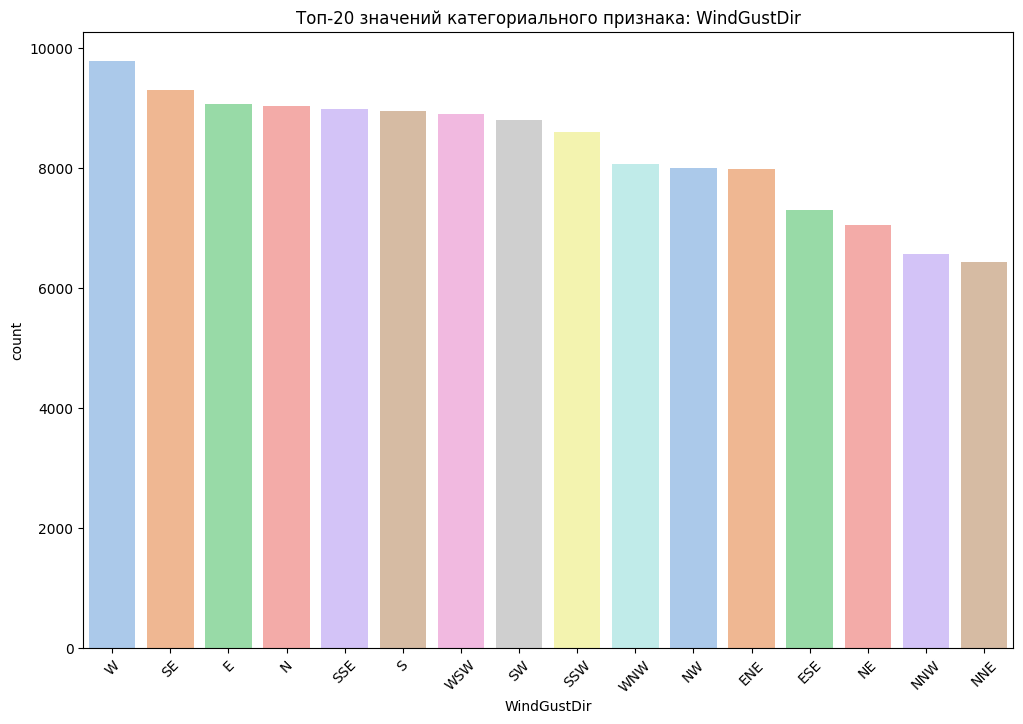

C:\Users\dima2\AppData\Local\Temp\ipykernel_13260\774907253.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=top_values, palette='pastel')


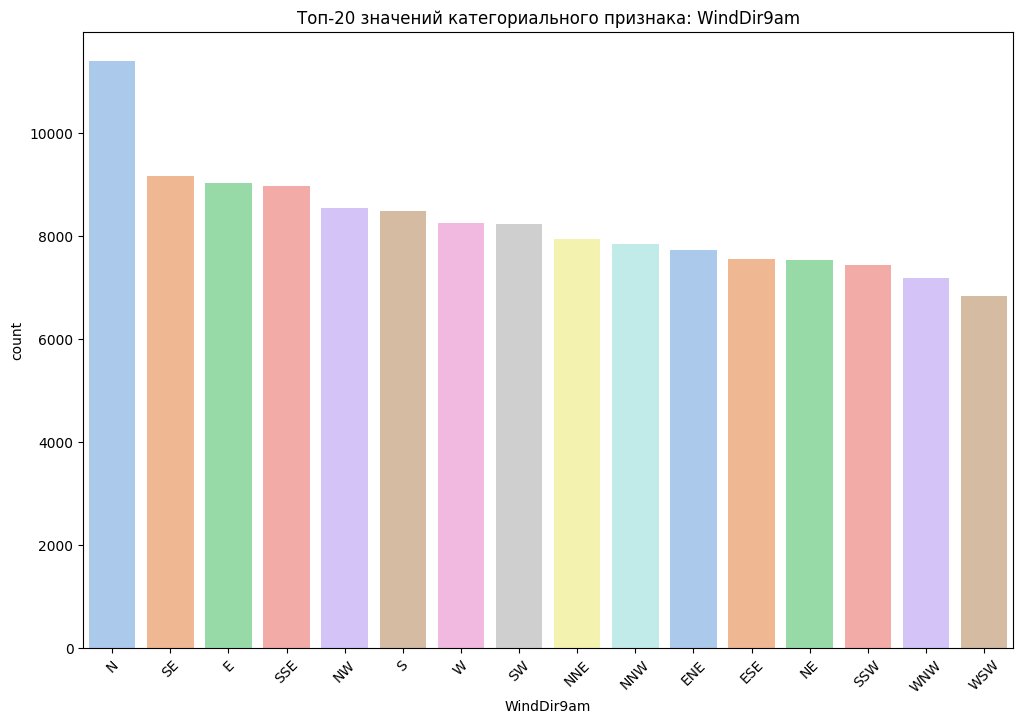

C:\Users\dima2\AppData\Local\Temp\ipykernel_13260\774907253.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=top_values, palette='pastel')


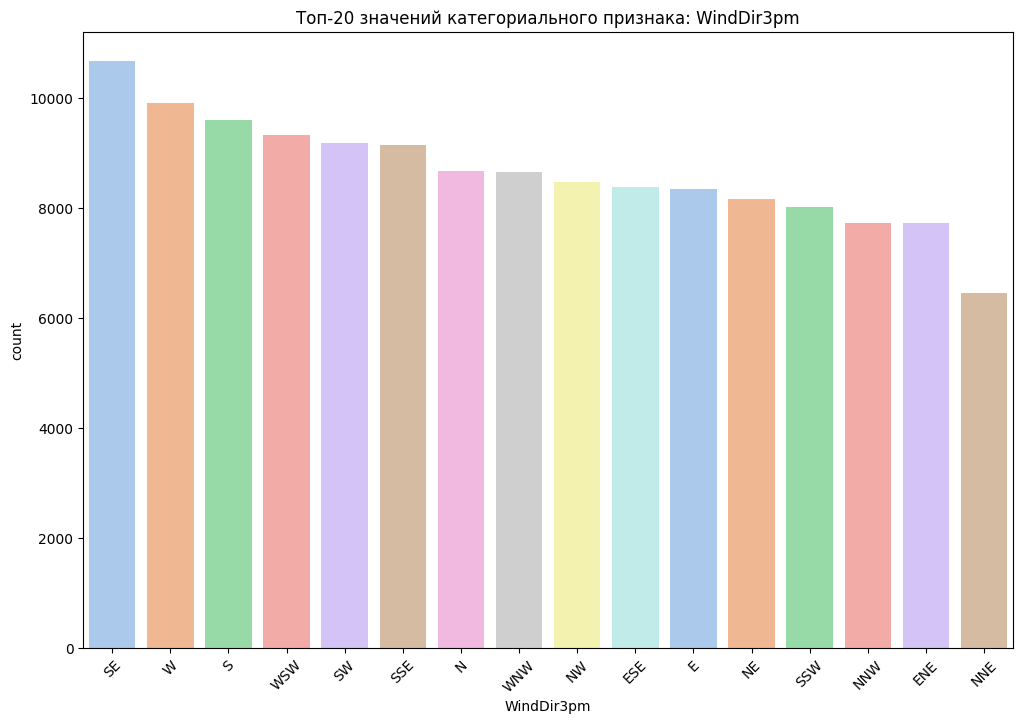

C:\Users\dima2\AppData\Local\Temp\ipykernel_13260\774907253.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=top_values, palette='pastel')


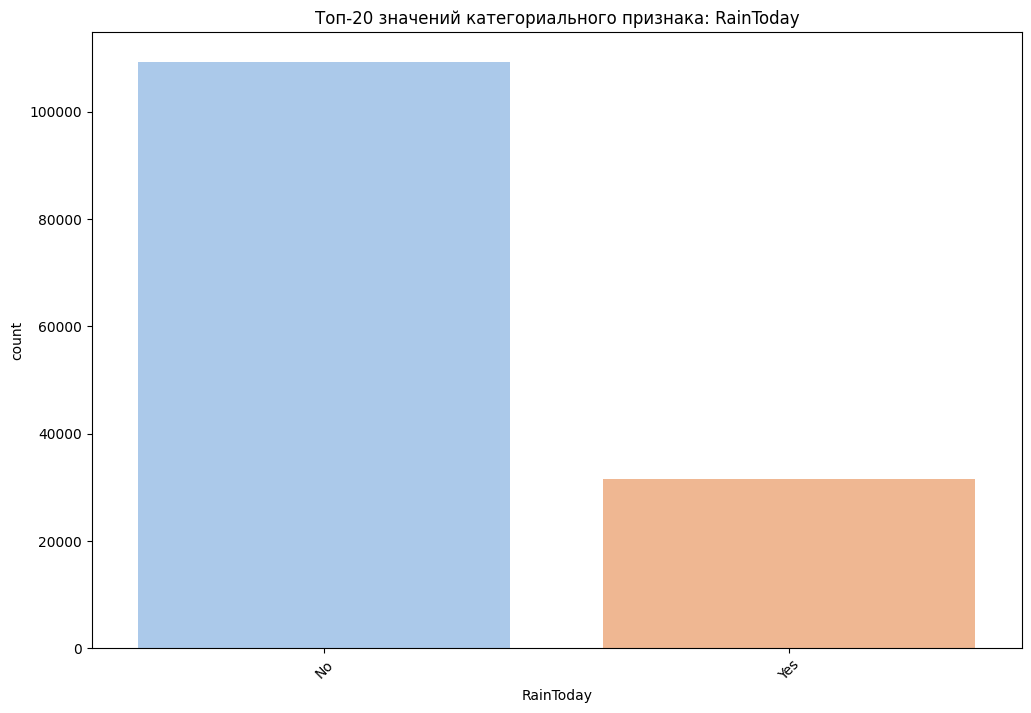

C:\Users\dima2\AppData\Local\Temp\ipykernel_13260\774907253.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=top_values, palette='pastel')


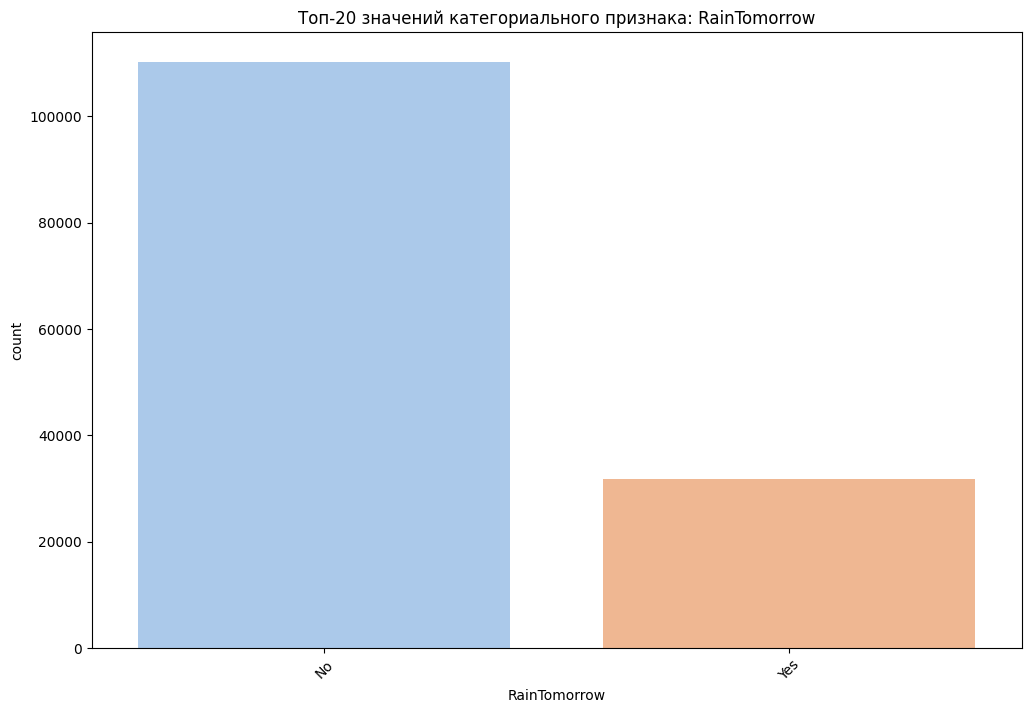

In [11]:
#Смотрим распределения категориальных признаков
categorical_features = df.select_dtypes(include='object')
top_n = 20
for col in categorical_features:
    top_values = df[col].value_counts().nlargest(top_n).index
    plt.figure(figsize=(12,8))
    sns.countplot(x=df[col], order=top_values, palette='pastel')
    plt.title(f'Топ-{top_n} значений категориального признака: {col}')
    plt.xticks(rotation=45)
    plt.show()


In [12]:
df.drop([])

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,...,22.0,1007.7,1007.1,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,...,25.0,1010.6,1007.8,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,...,30.0,1007.6,1008.7,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,...,16.0,1017.6,1012.8,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,...,33.0,1010.8,1006.0,17.8,29.7,No,No,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,...,27.0,1024.7,1021.2,9.4,20.9,No,No,2017,6,20
145455,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,...,24.0,1024.6,1020.3,10.1,22.4,No,No,2017,6,21
145456,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,...,21.0,1023.5,1019.1,10.9,24.5,No,No,2017,6,22
145457,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,...,24.0,1021.0,1016.8,12.5,26.1,No,No,2017,6,23


In [13]:
#Удаляем пропуски в категориальных признаках
cat_features = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


#for col in cat_features:
    #X[col] = X[col].fillna('missing').astype(str)
for col in cat_features:
    df[col] = df[col].fillna('missing').astype(str)
    print(f'{col} = {df[col].unique()}')

Location = ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
WindGustDir = ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 'missing' 'E' 'SSW']
WindDir9am = ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'missing' 'SSW' 'N' 'WSW' 'ESE'
 'E' 'NW' 'WNW' 'NNE']
WindDir3pm = ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' 'missing' 'NE']
RainToday = ['No' 'Yes' 'missing']


In [14]:
new_df = df.copy()
new_df.drop('RainTomorrow', axis=1, inplace=True)


In [15]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   WindGustDir    142193 non-null  object 
 5   WindGustSpeed  132923 non-null  float64
 6   WindDir9am     142193 non-null  object 
 7   WindDir3pm     142193 non-null  object 
 8   WindSpeed9am   140845 non-null  float64
 9   WindSpeed3pm   139563 non-null  float64
 10  Humidity9am    140419 non-null  float64
 11  Humidity3pm    138583 non-null  float64
 12  Pressure9am    128179 non-null  float64
 13  Pressure3pm    128212 non-null  float64
 14  Temp9am        141289 non-null  float64
 15  Temp3pm        139467 non-null  float64
 16  RainToday      142193 non-null  object 
 17  Year           142193 non-null  in

interval columns not set, guessing: ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


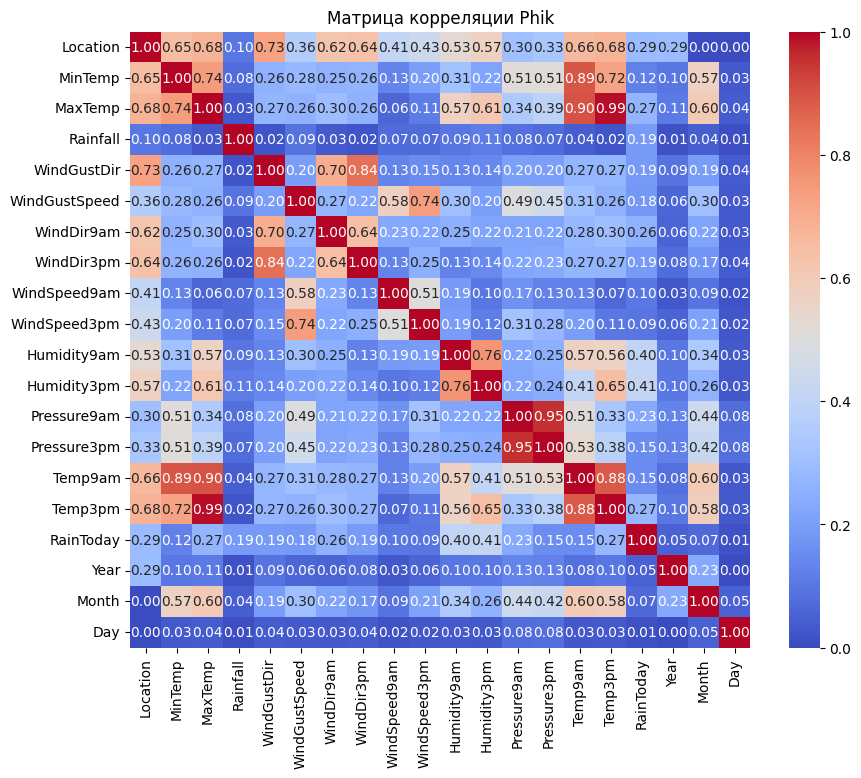

In [ ]:
#Построим матрицу корреляций
phik_matrix = new_df.phik_matrix()

plt.figure(figsize=(10,8))
sns.heatmap(phik_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Матрица корреляции Phik")
plt.show()
#Видим сильную корреляцию между одинаковыми признаками в разное время и корреляцию локации с большинством остальных признаков

In [ ]:
X = new_df.copy()
y = df['RainTomorrow']


In [ ]:
X['RainToday'].value_counts()#Смотрим количество пропущенных значений 

RainToday
No         109332
Yes         31455
missing      1406
Name: count, dtype: int64

In [ ]:
print(X.info())#Смотрим количество пропусков и тип объектов

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   WindGustDir    142193 non-null  object 
 5   WindGustSpeed  132923 non-null  float64
 6   WindDir9am     142193 non-null  object 
 7   WindDir3pm     142193 non-null  object 
 8   WindSpeed9am   140845 non-null  float64
 9   WindSpeed3pm   139563 non-null  float64
 10  Humidity9am    140419 non-null  float64
 11  Humidity3pm    138583 non-null  float64
 12  Pressure9am    128179 non-null  float64
 13  Pressure3pm    128212 non-null  float64
 14  Temp9am        141289 non-null  float64
 15  Temp3pm        139467 non-null  float64
 16  RainToday      142193 non-null  object 
 17  Year           142193 non-null  in

In [20]:
X['RainToday'].value_counts()

RainToday
No         109332
Yes         31455
missing      1406
Name: count, dtype: int64

In [21]:
print(y.info())

<class 'pandas.core.series.Series'>
Index: 142193 entries, 0 to 145458
Series name: RainTomorrow
Non-Null Count   Dtype 
--------------   ----- 
142193 non-null  object
dtypes: object(1)
memory usage: 6.2+ MB
None


In [22]:
X.isnull().sum()

Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
WindGustDir          0
WindGustSpeed     9270
WindDir9am           0
WindDir3pm           0
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Temp9am            904
Temp3pm           2726
RainToday            0
Year                 0
Month                0
Day                  0
dtype: int64

In [ ]:
X['RainToday'] = X['RainToday'].map({'No':0, 'Yes':1})  # сначала заменяем строки
X['RainToday'] = X['RainToday'].fillna(-1)             # пропуски заменяем на -1

print(X.dtypes)
#Преобразовываем в числовой признак

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Temp9am          float64
Temp3pm          float64
RainToday        float64
Year               int32
Month              int32
Day                int32
dtype: object


In [24]:
X['RainToday'].value_counts()

RainToday
 0.0    109332
 1.0     31455
-1.0      1406
Name: count, dtype: int64

In [25]:
X['WindDir3pm'].value_counts()

WindDir3pm
SE         10663
W           9911
S           9598
WSW         9329
SW          9182
SSE         9142
N           8667
WNW         8656
NW          8468
ESE         8382
E           8342
NE          8164
SSW         8010
NNW         7733
ENE         7724
NNE         6444
missing     3778
Name: count, dtype: int64

In [26]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_transformer = SimpleImputer(strategy='mean')

cat_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
cat_transformer = TargetEncoder(handle_unknown='use_encoded_value', handle_missing='value')


preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ],
    remainder='passthrough'
)
#Делаем препроцессор для предобработки признаков, пропуски в числовых заменяем mean и обрабатываем категориальные с помощью таргет энкодера

In [27]:
#Построим пайплайн ддя всех получившихся обработок
preprocessor_pipline = Pipeline([
    ('preprocessed', preprocessor)
])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.2, stratify=y
)
#Делим данные на треин и тест

In [ ]:
X_train_preprocessed = X_train.copy()
X_test_preprocessed = X_test.copy()
#Скопируем  данные для дальнейшей предобработки


In [31]:
print(X_train.columns)

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'Year', 'Month',
       'Day'],
      dtype='object')


In [32]:
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
103642,Nuriootpa,19.3,34.8,0.0,SE,56.0,ESE,SSE,15.0,7.0,52.0,20.0,1013.4,1010.6,24.3,33.6,0.0,2012,1,25
18697,NorahHead,NaN,NaN,0.2,S,39.0,W,S,11.0,22.0,NaN,NaN,1020.5,1019.0,NaN,NaN,0.0,2010,8,6
99305,Adelaide,13.0,23.4,0.0,WSW,43.0,NW,SW,2.0,22.0,64.0,44.0,1012.5,1010.4,16.4,23.1,0.0,2016,11,30
142981,Katherine,25.0,33.4,0.0,NW,63.0,N,NW,19.0,26.0,75.0,54.0,1004.3,1001.2,29.4,33.0,0.0,2015,1,7
85572,Brisbane,15.3,25.8,0.0,E,30.0,SE,E,9.0,13.0,58.0,45.0,1024.9,1021.2,21.3,24.2,0.0,2012,11,12


In [33]:
X_test.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
48872,Canberra,15.1,32.9,0.0,E,50.0,E,W,7.0,11.0,73.0,32.0,1015.5,1011.8,19.0,30.3,0.0,2017,1,26
100864,MountGambier,8.4,16.2,0.0,WSW,46.0,N,W,28.0,28.0,45.0,74.0,1011.3,1011.9,13.7,14.6,0.0,2012,9,12
123233,Perth,17.0,24.7,0.0,SW,39.0,S,SSW,13.0,20.0,56.0,57.0,1007.1,1003.7,21.4,24.2,0.0,2015,11,6
7228,Cobar,12.3,18.8,0.0,WSW,39.0,SW,W,19.0,20.0,51.0,29.0,1017.7,1015.6,12.9,18.0,0.0,2012,4,24
3948,BadgerysCreek,1.1,18.3,0.2,N,13.0,missing,NNE,0.0,6.0,100.0,49.0,1029.5,1025.5,7.1,17.9,0.0,2011,7,28


In [34]:
print(type(X_train))  # должно быть <class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>


In [36]:
# === 5. Трансформация ===
X_train_transformed = preprocessor_pipline.fit_transform(X_train, y_train)
X_test_transformed = preprocessor_pipline.transform(X_test)

# === 6. Сохраняем имена колонок ===
# Числовые колонки остаются как есть
num_features = num_cols

# Категориальные — через TargetEncoder новые колонки соответствуют старым
cat_features = cat_cols

# Объединяем все колонки
all_features = list(num_features) + list(cat_features)
transformed_columns = (num_cols + cat_cols +
                       [c for c in X_train.columns if c not in num_cols + cat_cols])

# Преобразуем NumPy массив обратно в DataFrame
X_train_preprocessed = pd.DataFrame(X_train_transformed, index=X_train.index, columns=transformed_columns)
X_test_preprocessed = pd.DataFrame(X_test_transformed, index=X_test.index, columns=transformed_columns)

# === 7. Проверка ===
print(X_train_preprocessed.head().to_string())
print(X_test_preprocessed.head().to_string())

          MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm    Temp9am    Temp3pm  RainToday  Location  WindGustDir  WindDir9am  WindDir3pm    Year  Month   Day
103642  19.300000  34.80000       0.0           56.0          15.0           7.0    52.000000    20.000000       1013.4       1010.6  24.300000  33.600000        0.0  0.200249     0.183750    0.148099    0.187714  2012.0    1.0  25.0
18697   12.172898  23.21887       0.2           39.0          11.0          22.0    68.838493    51.505227       1020.5       1019.0  16.977363  21.676257        0.0  0.269347     0.227687    0.263758    0.215530  2010.0    8.0   6.0
99305   13.000000  23.40000       0.0           43.0           2.0          22.0    64.000000    44.000000       1012.5       1010.4  16.400000  23.100000        0.0  0.223258     0.234448    0.280658    0.198091  2016.0   11.0  30.0
142981  25.000000  33.40000       0.0           63.0          19

In [37]:
X_train_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113754 entries, 103642 to 122308
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        113754 non-null  float64
 1   MaxTemp        113754 non-null  float64
 2   Rainfall       113754 non-null  float64
 3   WindGustSpeed  113754 non-null  float64
 4   WindSpeed9am   113754 non-null  float64
 5   WindSpeed3pm   113754 non-null  float64
 6   Humidity9am    113754 non-null  float64
 7   Humidity3pm    113754 non-null  float64
 8   Pressure9am    113754 non-null  float64
 9   Pressure3pm    113754 non-null  float64
 10  Temp9am        113754 non-null  float64
 11  Temp3pm        113754 non-null  float64
 12  RainToday      113754 non-null  float64
 13  Location       113754 non-null  float64
 14  WindGustDir    113754 non-null  float64
 15  WindDir9am     113754 non-null  float64
 16  WindDir3pm     113754 non-null  float64
 17  Year           113754 non-nul

In [38]:
X_test_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28439 entries, 48872 to 91578
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        28439 non-null  float64
 1   MaxTemp        28439 non-null  float64
 2   Rainfall       28439 non-null  float64
 3   WindGustSpeed  28439 non-null  float64
 4   WindSpeed9am   28439 non-null  float64
 5   WindSpeed3pm   28439 non-null  float64
 6   Humidity9am    28439 non-null  float64
 7   Humidity3pm    28439 non-null  float64
 8   Pressure9am    28439 non-null  float64
 9   Pressure3pm    28439 non-null  float64
 10  Temp9am        28439 non-null  float64
 11  Temp3pm        28439 non-null  float64
 12  RainToday      28439 non-null  float64
 13  Location       28439 non-null  float64
 14  WindGustDir    28439 non-null  float64
 15  WindDir9am     28439 non-null  float64
 16  WindDir3pm     28439 non-null  float64
 17  Year           28439 non-null  float64
 18  Month  

In [39]:
y_train.value_counts()

RainTomorrow
0    88252
1    25502
Name: count, dtype: int64

In [40]:
y_train = y_train.map({'No': 0, 'Yes': 1})
y_test = y_test.map({'No': 0, 'Yes': 1})


In [52]:
import pandas as pd
import os

# === Пути к директориям ===
project_path = r"D:\dowload2\Classification_project"
processed_dir = os.path.join(project_path, "data", "processed")
os.makedirs(processed_dir, exist_ok=True)

# === Пути к файлам ===
paths = {
    "X_train": os.path.join(processed_dir, "X_train.csv"),
    "X_test": os.path.join(processed_dir, "X_test.csv"),
    "y_train": os.path.join(processed_dir, "y_train.csv"),
    "y_test": os.path.join(processed_dir, "y_test.csv"),
    "X_train_preprocessed": os.path.join(processed_dir, "X_train_preprocessed.csv"),
    "X_test_preprocessed": os.path.join(processed_dir, "X_test_preprocessed.csv")
}

# === Сохраняем базовые данные ===
X_train.to_csv(paths["X_train"], index=False)
X_test.to_csv(paths["X_test"], index=False)

# ВАЖНО: сохраняем целевую переменную как DataFrame с именем столбца
pd.DataFrame({"target": y_train}).to_csv(paths["y_train"], index=False)
pd.DataFrame({"target": y_test}).to_csv(paths["y_test"], index=False)

# === Сохраняем предобработанные данные ===
X_train_preprocessed.to_csv(paths["X_train_preprocessed"], index=False)
X_test_preprocessed.to_csv(paths["X_test_preprocessed"], index=False)

print("✅ Все данные успешно сохранены в папку:")
for name, path in paths.items():
    print(f"  {name}: {path}")


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\dima2\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\dima2\AppData\Local\Temp\ipykernel_13260\1936907941.py", line 28, in <module>
    X_train_preprocessed.to_csv(paths["X_train_preprocessed"], index=False)
  File "c:\Users\dima2\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\util\_decorators.py", line 333, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dima2\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\generic.py", line 3967, in to_csv
    return DataFrameRenderer(formatter).to_csv(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dima2\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\io\formats\format.py", line 1014, in to_csv
    csv_formatter.save()
  File "c:\Users\dima2\AppData\Loca